# Problem :

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

# Develop an text classification model based on CNN + LSTM in Keras.

In this assignment, you will have to train two Text classification:
1) LSTM based Text Classification
2) CNN + LSTM based Text Classification

After training the two different classification, you have to compare the F1 Score on both of the model trained and report the best F1 Score for which of them.

This notebook is divided into six parts. Total : [12 Marks]

1. Calculate the average length of reviews and modifying the length of sentences in X_train , X_test, X_cv [2 Mark]
2. Implement the LSTM model [3 Marks]
3. Calculate the LSTM model F1 Score [1 Mark]
4. Implement the CNN + LSTM [3 Marks]
5. Calculate the CNN + LSTM model F1 Score [1 Mark]
6. Identify and decode 5 of the sentences misclassified by LSTM model which  were correctly classified by CNN + LSTM model [2 Mark]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from IPython.display import Image
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import imdb

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)

print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_cv.shape)

Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of CV data: (5000,)


In [3]:
# truncate and pad input sequences
# Calculate the average length of reviews using the training set (X_train) and set the value to max_review_length
# truncate or pad the reviews so that length of all the reviews are same
average_review_length = int(np.mean([len(x) for x in X_train]))

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen = average_review_length)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen = average_review_length)
X_cv = keras.preprocessing.sequence.pad_sequences(X_cv, maxlen = average_review_length)

In [4]:
# Decoding the data coded data of IMDB ( Data Understanding )
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # it's hard to criticize this movie because i dislike the story itself and no amount of good acting would have saved it think raising arizona with a mean streak the acting is passable but jennifer # is way over the top yet not enough to make this a nice camp film as usual coming in somewhere between misery and a sarcastic # employee the rest of the cast have their # # # in # either from the stress of their parts or the stress of the whole # exercise a real # few hours of film # hannah spends most of the movie # too hard to be understood i wish i could tell you how it ended but i walked out sorry


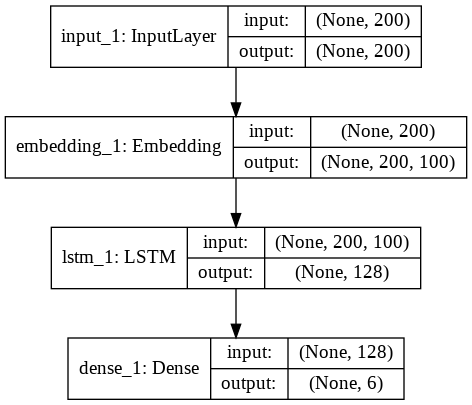

In [5]:
# Architecture Diagram for LSTM Based Classifcation but you will have to change the
# configuration/model parameters while implementing it depending on the input , output and the 
# Problem statement.
Image(filename='LSTM_model.png')

In [6]:
embedding_vector_length = 64
model_lstm = tf.keras.Sequential()

# Write the code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer
# Use appropriate activation function in respective layers

# Students will be starting their code from here:

model_lstm.add(keras.layers.Embedding(top_words, embedding_vector_length, input_length=average_review_length))

model_lstm.add(keras.layers.LSTM(100))

model_lstm.add(keras.layers.Dense(1, activation="sigmoid"))

# Students will be ending their code here

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_lstm.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 238, 64)           640000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               66000     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 706,101
Trainable params: 706,101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 56s 175ms/step - loss: 0.4457 - accuracy: 0.7837 - val_loss: 0.3429 - val_accuracy: 0.8606
Epoch 2/5
313/313 [==============================] - 53s 168ms/step - loss: 0.2626 - accuracy: 0.8982 - val_loss: 0.3156 - val_accuracy: 0.8672
Epoch 3/5
313/313 [==============================] - 51s 165ms/step - loss: 0.1891 - ac

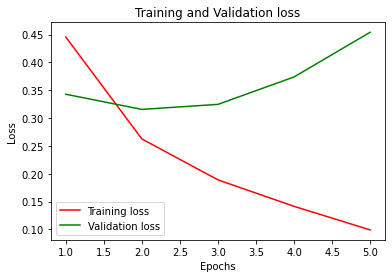

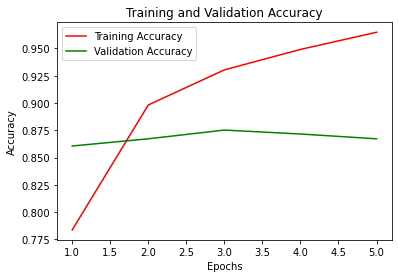

F1 score: 0.85


In [7]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:

# plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict the label of the test data
y_pred_lstm = model_lstm.predict_classes(X_test)

# print the f1 score
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred_lstm)))

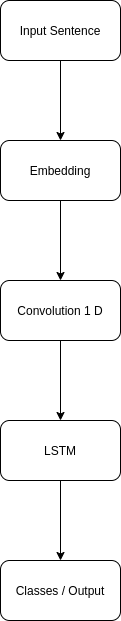

In [8]:
# High Level Model Architecture
Image(filename='1_VGtBedNuZyX9E-07gnm2Yg.png')

In [9]:
# create the model
embedding_vector_length = 64
model_cnn_lstm = Sequential()

# Students will be starting their code from here:

# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer
# Use appropriate activation function in respective layers

model_cnn_lstm.add(keras.layers.Embedding(top_words, embedding_vector_length, input_length=average_review_length))

model_cnn_lstm.add(keras.layers.Convolution1D(filters=100, kernel_size=2, padding='same', activation='relu'))

model_cnn_lstm.add(keras.layers.LSTM(100))

model_cnn_lstm.add(keras.layers.Dense(1, activation = 'sigmoid'))

# Students will be ending their code here

model_cnn_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn_lstm.summary())

# Change the number of epochs and the batch size depending on the RAM Size
history = model_cnn_lstm.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 238, 64)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 238, 100)          12900     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 733,401
Trainable params: 733,401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 73s 228ms/step - loss: 0.4936 - accuracy: 0.7426 - val_loss: 0.3275 - val_accuracy: 0.8620
Epoch 2/5
313/313 [==============================] - 69s 219ms/step - loss: 0.2573 - accuracy: 0.

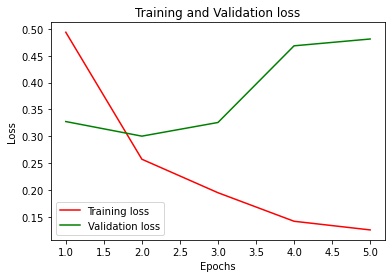

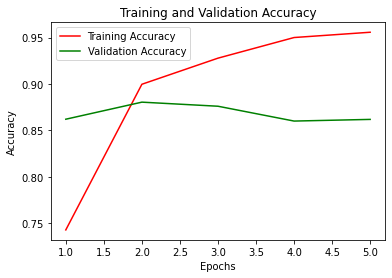

F1 score: 0.85


In [10]:
# Final evaluation of the CNN + RNN model using the test data
# Students will be starting their code from here:

# plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict the label of the test data
y_pred_cnn_lstm = model_cnn_lstm.predict_classes(X_test)

# print the f1 score
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred_cnn_lstm)))

In [11]:
# Identify and decode 5 of the sentences misclassified by LSTM model which  were correctly classified by CNN + LSTM model
# Students will be starting their code from here:

count = i = 0

while ( ( count < 5 ) and ( i < len(y_test) ) ) :

    if ( ( y_pred_lstm[i] != y_test[i] ) and ( y_pred_cnn_lstm[i] == y_test[i] ) ):
        print ("Sentence#", count+1, "misclassified by LSTM but correctly classified by CNN + LSTM is :", " ".join( [reverse_index.get(i - 3, "#") for i in X_test[i]] ) )
        count += 1

    i += 1

Sentence# 1 misclassified by LSTM but correctly classified by CNN + LSTM is : # looking new king who towers above them the # welcome him with a # of # dressed # the mayor steps forward to hand him the key to the # as # cameras record the event to everyone's horror the # promptly eats the mayor and then goes on a merry rampage # citizens at random a title card # reads news of the king's # throughout the kingdom when the now terrified # once more # # for help he loses his temper and # their community with lightning # the moral of our story delivered by a hapless frog just before he is eaten is let well enough alone br br considering the time period when this startling little film was made and considering the fact that it was made by a russian # at the height of that # country's civil war it would be easy to see this as a # about those events # may or may not have had # turmoil in mind when he made # but whatever # his choice of material the film stands as a # tale of universal # # could 